In [1]:
from sklearn.datasets import make_regression
from sklearn import linear_model

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
'''
Super class for the Gradient Descent Algorithm, which gets initialized with the parameters as

iterations - the number of iterations in order to obtain the Global minimum / J(0) / Minimized cost function
alpha - learning rate to follow while performing the descend
scale [defaulted to False], if set to True this will scale the X with the help of mean and standard deviation
verbose [defaulted to False], if set to True this will log details to the console.
'''


class BGDRegression:
    def __init__(self,
                 iterations,
                 alpha=0.001,
                 scale=False,
                 verbose=False,
                 plot=False):
        self._iterations = iterations
        self._theta = None
        self._cost_history = []
        self._alpha = alpha
        self._verbose = verbose

    '''
        Sets the model parametes[theta] using the gradient descent algorithm
        
        The goal of any Machine Learning Algorithm is to minimize the Cost Function {J(\theta)}.
    '''

    def generate_model(self, X, y):
        # Initialize Theta with the number of columns and inclusion of Theat_0
        try:
            # initialize to 0's [random value should be okay, but i am defaulting to 0]
            self._theta = np.matrix(np.zeros(X.shape[1]).T)
            self._cost_history = []
            for i in range(self._iterations):
                cost = self.gradient_descent(
                    X, y, self._alpha)
                #print('Cost for iteration {} is {} and theta {} .'.format(i, cost, self._theta))
                self._cost_history.append(cost)
                
        except ValueError as err:
            print(
                'Issue Occured while performing the Gradient Descent',
                err)
        return self._theta

    '''
        //TODO not required as there is already method exists
        y = h(x) or f(x) = x1.theta_1 + x2.theta_2 + .... x_m.theta_m
    '''

    def predict(self, X):
        return self.hypothesis(X)

    '''
        
    '''

    def gradient_descent(self, X, y, alpha):

        # Temp matrix to preserve theta during the iterations
        temp = np.matrix(np.zeros(self._theta.shape))
        features = int(self._theta.ravel().shape[1])
        
        #self._cost_history = np.zeros(self._iterations)
        error = self.loss_function(X, y)
        
        # For Every Feature iterate and calculate gradient with the new coefficent
        for j in range(features):
            # Calculate the graident
            gradient = np.multiply(error, X[:, j])

            # theta(j) = theta(j) - 1/m(alpha * sum of all (residuals))
            temp[0, j] = self._theta[0, j] - (
                (self._alpha / len(X)) * np.sum(gradient))

        self._theta = temp
        return self.cost_function(X, y)

    '''
        Mean Absolute Error = 1/m * sum of all absolute loss(|pred - y|)
    '''

    def mae(self, X, y):
        mae = (1.0 / len(y)) * np.sum(np.abs(self.loss_function(X, y)))
        return mae

    '''
       Mean Square Error = 1/2 * m sum of all((pred - y)^2)
       where m is the population size
    '''

    def mse(self, X, y):
        return self.cost_function(X, y)

    '''
        A Cost function basically tells us ‘ How Good’ our model is at 
        making predictions for a given value of m and b.
    
        Cost j(theta) = 1/2 m * (sigma h(theta) - y )^2
    '''

    def cost_function(self, X, y):
        return self.sum_of_squared_residual(X, y) / (2 * len(X))

    '''
        Sum of Squared Residuals ie. loss/error function
    '''

    def sum_of_squared_residual(self, X, y):
        return np.sum(np.power(self.loss_function(X, y), 2))

    '''
        Hypothesis h(x) or f(x) = X * Transpose(theta), where theta is the model parameters
    '''

    def hypothesis(self, X):
        return (X * self._theta.T)

    '''
        Loss Function : Predicted Value - Actual Value
    '''

    def loss_function(self, X, y):
        return self.hypothesis(X) - y

In [3]:
def create_data_set(size):
    bias = np.random.uniform(-5, 5)
    data_noise = np.random.uniform(4, 8)
    x_values, y_values = make_regression(n_samples=size, n_features=1, noise=data_noise,
                                         bias=bias)

    return x_values, y_values.reshape(-1, 1)

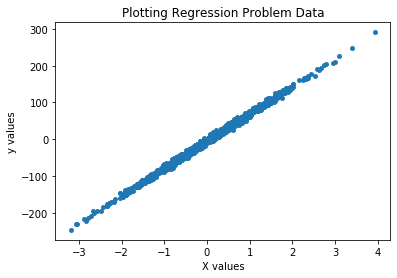

In [4]:
# Generating values 'X' and labels 'y'
X, y = create_data_set(1000)

# Presenting generated data
plt.scatter(X, y, s=15)
plt.title("Plotting Regression Problem Data")
plt.xlabel("X values")
plt.ylabel("y values")
plt.show()

In [5]:
iterations = 10000

In [6]:
X_withx0 = np.insert(np.matrix(X), 0, 1, axis=1)
Y_matrix = np.matrix(y)

linear_regression_model = BGDRegression(iterations, scale=True, verbose=True)
linear_regression_model.generate_model(X_withx0, Y_matrix)
print(linear_regression_model._theta)

[[-4.68699137 74.36530667]]


In [7]:
print(linear_regression_model.mse(X_withx0, Y_matrix))

12.079602989635529


Text(0, 0.5, '$J(0)$')

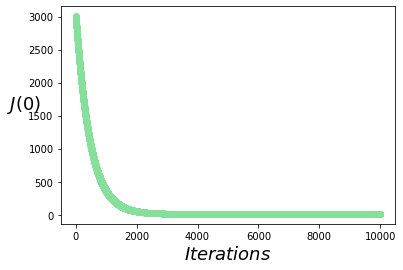

In [8]:
# Random Color generation function used during plotting
def get_color():
    return np.random.rand(3, )

plt.scatter(range(len(linear_regression_model._cost_history)), linear_regression_model._cost_history, color=get_color(), label='J(0)')
plt.xlabel("$Iterations$", fontsize=18)
plt.ylabel("$J(0)$", rotation=0, fontsize=18)

In [9]:
from sklearn.metrics import r2_score
print("R^2 : ", r2_score(Y_matrix, linear_regression_model.predict(X_withx0)))

R^2 :  0.9959841140707754


In [10]:
bagdata = pd.read_csv(r'Data_Multivariate.csv')
learning_rate = 0.01
iterations = 1000

bagdata = (bagdata - bagdata.mean()) / bagdata.std()

mv_y = bagdata.iloc[:, 0:1]

# add ones column
mv_x = np.c_[np.ones(bagdata.shape[0]),bagdata.iloc[:,1:]]
linear_regression_model = BGDRegression(iterations, scale=True, verbose=True)

linear_regression_model.generate_model(np.matrix(mv_x), np.matrix(mv_y))
print(linear_regression_model._theta)

[[-7.90527671e-18  2.11288702e-01  2.10977984e-01  2.08100145e-01
   1.53057080e-01  2.01520928e-01]]


In [11]:
print("R^2 : ", r2_score(mv_y, linear_regression_model.predict(mv_x)))

R^2 :  0.8803085670022534


Text(0, 0.5, '$J(0)$')

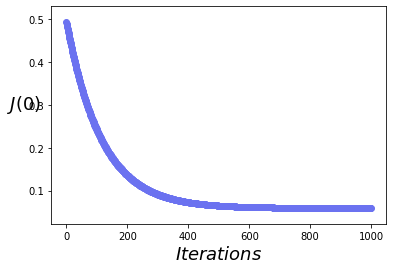

In [12]:
plt.scatter(range(len(linear_regression_model._cost_history)), linear_regression_model._cost_history, color=get_color(), label='J(0)')
plt.xlabel("$Iterations$", fontsize=18)
plt.ylabel("$J(0)$", rotation=0, fontsize=18)